### Assignment 2

In [192]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [193]:
plt.style.use('seaborn')

### Load Dataset

In [194]:
df_diabetes = pd.read_csv('./diabetes.csv')

In [195]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [196]:
print('Total rows:', df_diabetes.shape[0])
print('Total columns:', df_diabetes.shape[1])

Total rows: 768
Total columns: 9


### Check data Info

In [197]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [198]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Check Null Values

In [199]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [200]:
df_diabetes_copy = df_diabetes.copy(deep=True)

In [201]:
df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [202]:
#checking sum of NaN value
print(df_diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


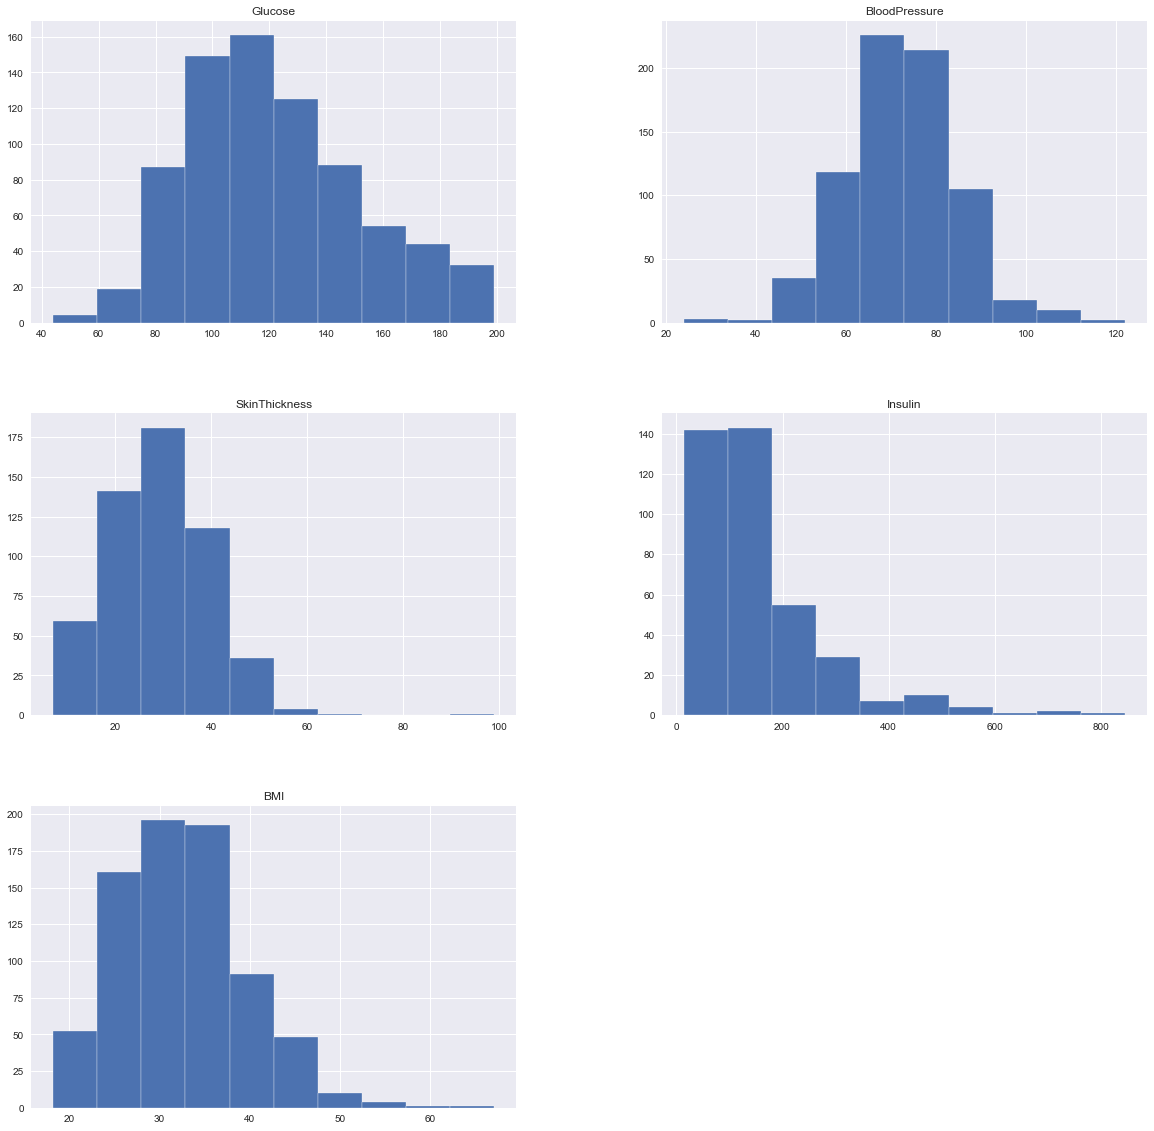

In [203]:
#checking distribution of each features ( before removing NaN )
p = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (20,20))

In [222]:
#replacing NaN value
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].median(), inplace = True)
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace = True)
df_diabetes_copy['SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace = True)
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].mean(), inplace = True)
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace = True)

### ploting after removal NaN value

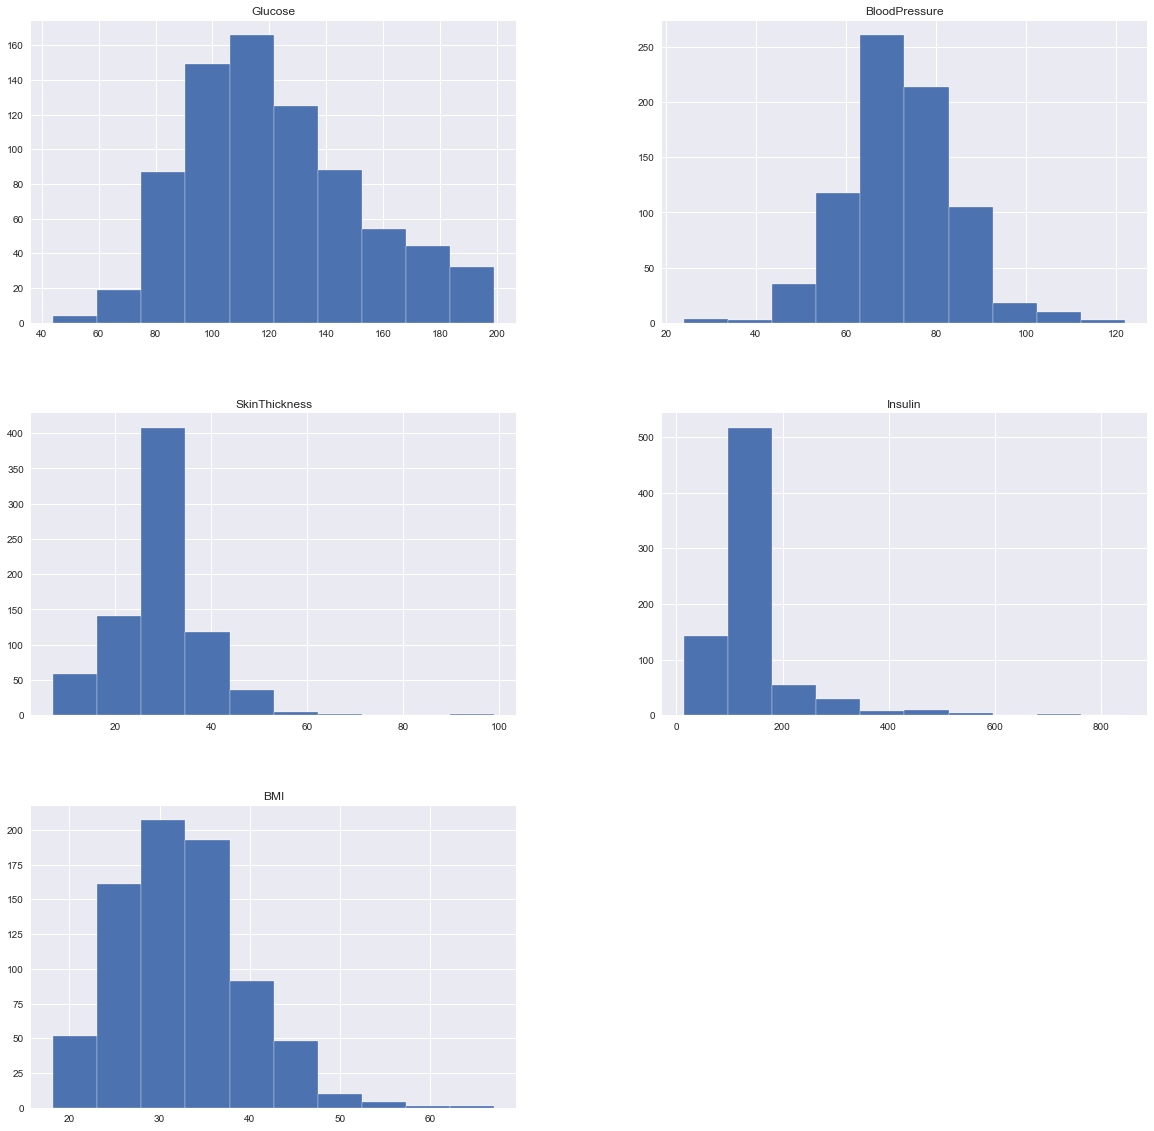

In [223]:
p = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (20,20))

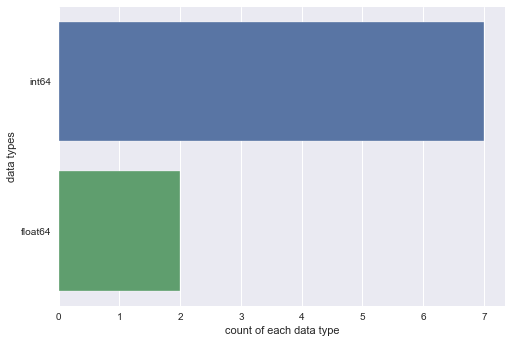

In [231]:
sns.countplot(y=df_diabetes.dtypes ,data=df_diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

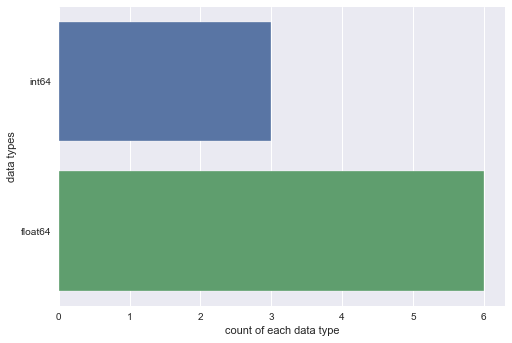

In [224]:
sns.countplot(y=df_diabetes_copy.dtypes ,data=df_diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

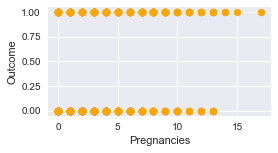

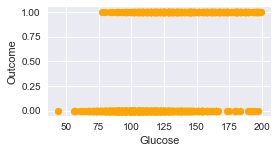

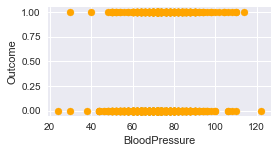

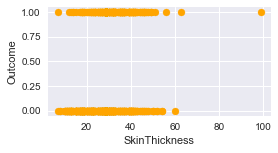

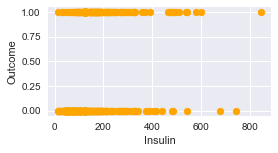

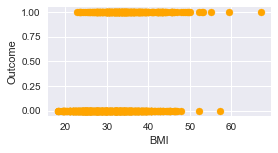

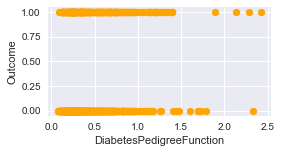

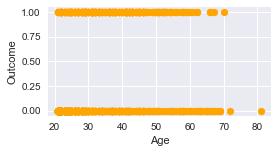

In [225]:
# Get the list of features (all columns except 'Outcome')
features = df_diabetes_copy.columns.drop('Outcome')

# Iterate over each feature and create a separate scatter plot
for feature in features:
    plt.figure(figsize=(4, 2))
    plt.scatter(df_diabetes_copy[feature], df_diabetes_copy['Outcome'], color='orange')
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.show()

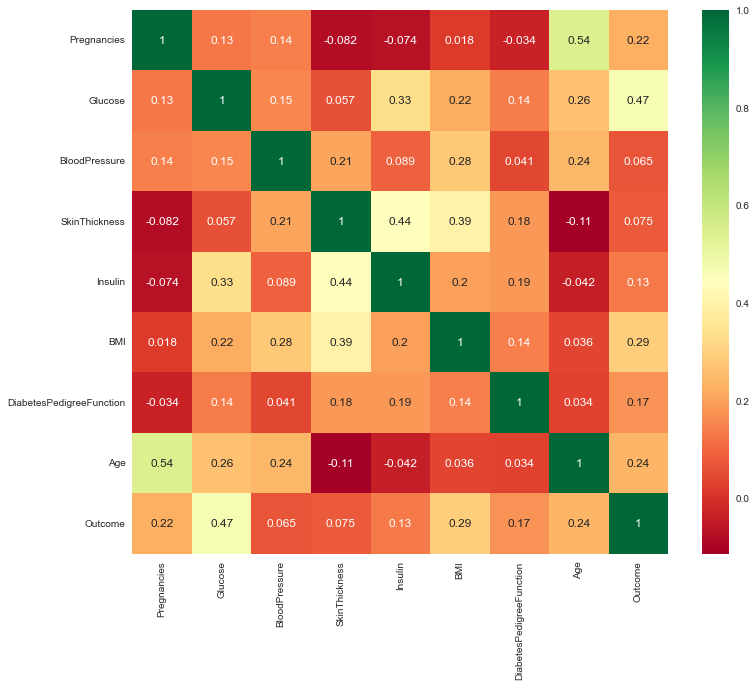

In [227]:
#heatmap for unclean data

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

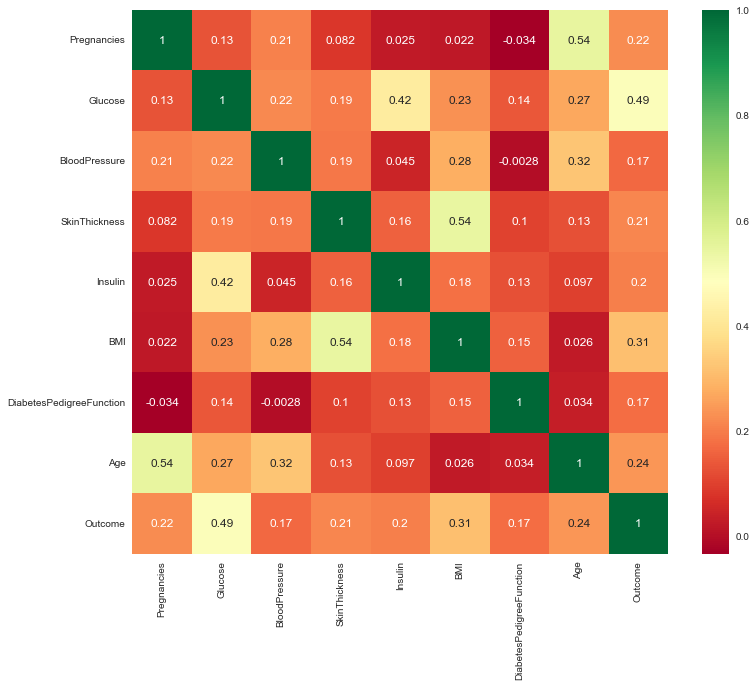

In [228]:
#heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_diabetes_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap